In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------- ------------------------------- 10.2/46.2 kB ? eta -:--:--
     ------------------------- ------------ 30.7/46.2 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 327.0 kB/s eta 0:00:00
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/377.1 MB 660.6 kB/s 

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\hp\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---- ---------------------------------- 40.7/377.1 MB 332.5 kB/s eta 0:16:52
   ---- ---------------------------------- 40.7/377.1 MB 332.5 kB/s eta 0:16:52
   ---- ---------------------------------- 40.8/377.1 MB 332.3 kB/s eta 0:16:53
   ---- ---------------------------------- 40.8/377.1 MB 332.5 kB/s eta 0:16:52
   ---- ---------------------------------- 40.8/377.1 MB 332.1 kB/s eta 0:16:53
   ---- ---------------------------------- 40.8/377.1 MB 332.1 kB/s eta 0:16:53
   ---- ---------------------------------- 40.8/377.1 MB 331.8 kB/s eta 0:16:54
   ---- ---------------------------------- 40.8/377.1 MB 331.8 kB/s eta 0:16:54
   ---- ---------------------------------- 40.8/377.1 MB 331.1 kB/s eta 0:16:56
   ---- ---------------------------------- 40.8/377.1 MB 331.1 kB/s eta 0:16:56
   ---- ---------------------------------- 40.8/377.1 MB 330.2 kB/s eta 0:16:59
   ---- ---------------------------------- 40.9/377.1 MB 329.9 kB/s eta 0:17:00
   ---- -------------------------------

In [2]:
pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 445.2 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.4 MB 751.6 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.4 MB 919.0 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 1.2 MB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.4 MB 1.8 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 2.0 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.4 MB 2.1 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.4 MB 2.1 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/

# Generating synthetic datasets that form concentric circles

In [23]:
#Your Code Here 
#You have to use make_cirlces that have 100 samples and noise 0.1 with random state 1 functions wil
X, y = make_circles(n_samples = 100, noise = 0.1, random_state=42)

In [24]:
X.shape

(100, 2)

In [25]:
y.shape

(100,)

<Axes: >

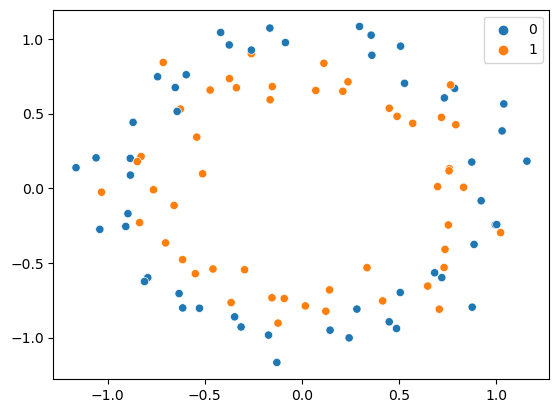

In [26]:
sns.scatterplot(x=X[:,0], y=X[:,1],hue = y)

# Split your dataset 

In [27]:
from sklearn.model_selection import train_test_split
#Split your dataset into training and testing sets, ensuring that 20% of the data is kept aside for testing purposes.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

# Build a simple neural network model

In [68]:
# Specify the neuraon = 256 input dimension and activation funtions
#one input layer and one output layer
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))

# Compile it

In [69]:
#Choose the loss, optimizer and accuracy matrices
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               768       
                                                                 
 dense_17 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
X_train.shape

(80, 2)

In [71]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=0)

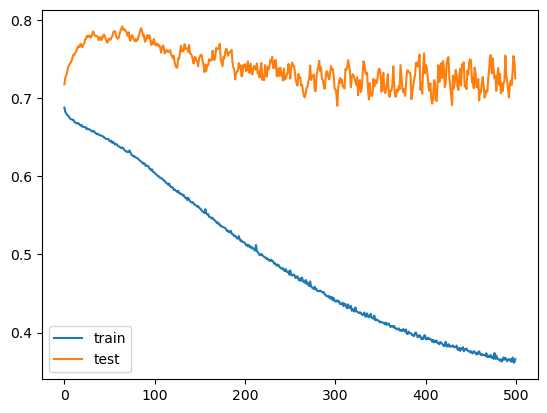

In [72]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 13s 1ms/step


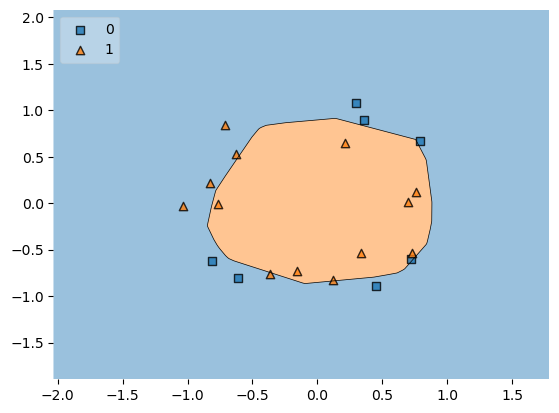

In [73]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [74]:
#Repeat your same model neural network model
model = Sequential()
model.add(Dense(256,activation = "relu",input_shape = (2,)))
model.add(Dense(1, activation='sigmoid'))


In [75]:
#Comple it
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               768       
                                                                 
 dense_19 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [94]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=callback)

Epoch 1/500
3/3 [==============================] - 0s 30ms/step - loss: 0.6333 - accuracy: 0.6125 - val_loss: 0.7878 - val_accuracy: 0.3500
Epoch 2/500
3/3 [==============================] - 0s 17ms/step - loss: 0.6317 - accuracy: 0.6250 - val_loss: 0.7856 - val_accuracy: 0.3000
Epoch 3/500
3/3 [==============================] - 0s 27ms/step - loss: 0.6320 - accuracy: 0.6375 - val_loss: 0.7889 - val_accuracy: 0.3500
Epoch 4/500
3/3 [==============================] - 0s 17ms/step - loss: 0.6308 - accuracy: 0.6500 - val_loss: 0.7912 - val_accuracy: 0.3500
Epoch 5/500
3/3 [==============================] - 0s 19ms/step - loss: 0.6304 - accuracy: 0.6375 - val_loss: 0.7944 - val_accuracy: 0.3500
Epoch 6/500
3/3 [==============================] - 0s 18ms/step - loss: 0.6288 - accuracy: 0.6375 - val_loss: 0.7980 - val_accuracy: 0.3500
Epoch 7/500
3/3 [==============================] - 0s 18ms/step - loss: 0.6276 - accuracy: 0.6125 - val_loss: 0.7930 - val_accuracy: 0.3500
Epoch 8/500
3/3 [===

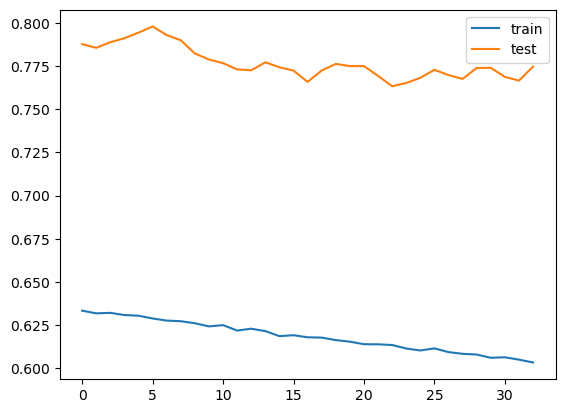

In [96]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 14s 1ms/step


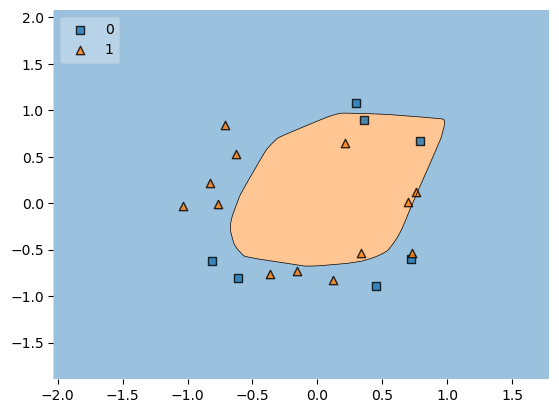

In [97]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()